In [2]:
import pandas as pd
df=pd.read_csv('DoS-1.csv')
df

,timestamp,arbitration_id,data_field,attack
0,1.672531e+09,1E5,460196E001FE6701,0
1,1.672531e+09,1E9,0010000C00580000,0
2,1.672531e+09,0F9,01B34003167D33FA,0
3,1.672531e+09,2F9,9301000000,0
4,1.672531e+09,199,CFFF0FFFEFFE00FF,0
...,...,...,...,...
90164,1.672531e+09,0C5,103E8D5B12405627,0
90165,1.672531e+09,184,000100000000,0
90166,1.672531e+09,1C7,08B8774700003F,0
90167,1.672531e+09,1CD,0000000000,0


In [3]:
df=pd.read_csv('DoS-3.csv')
df

,timestamp,arbitration_id,data_field,attack
0,1.672531e+09,0F1,28030040,0
1,1.672531e+09,0C1,21D609A5233BD342,0
2,1.672531e+09,0C5,233CA3B523D975D3,0
3,1.672531e+09,1E5,46FFC0C000003E01,0
4,1.672531e+09,12A,4700000047763FFF,0
...,...,...,...,...
154250,1.672531e+09,1E5,46FFA68000005A01,0
154251,1.672531e+09,1F1,AE0E00000800007A,0
154252,1.672531e+09,0F1,34030040,0
154253,1.672531e+09,1F3,0000,0


# Exploratory Data Analysis (EDA)
## Distribution analysis: Checking the distribution of arbitration_id and data_field

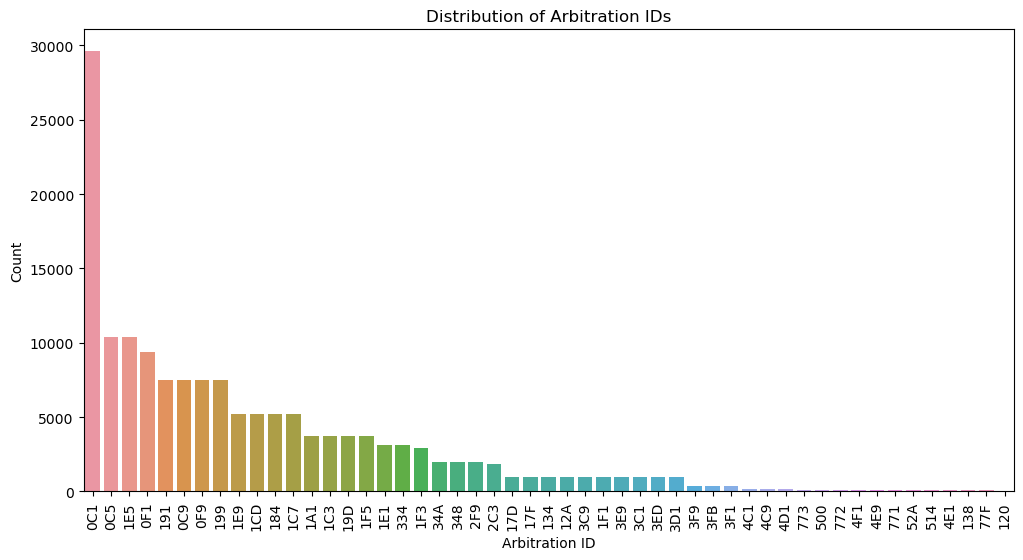

C:\Users\Lerin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


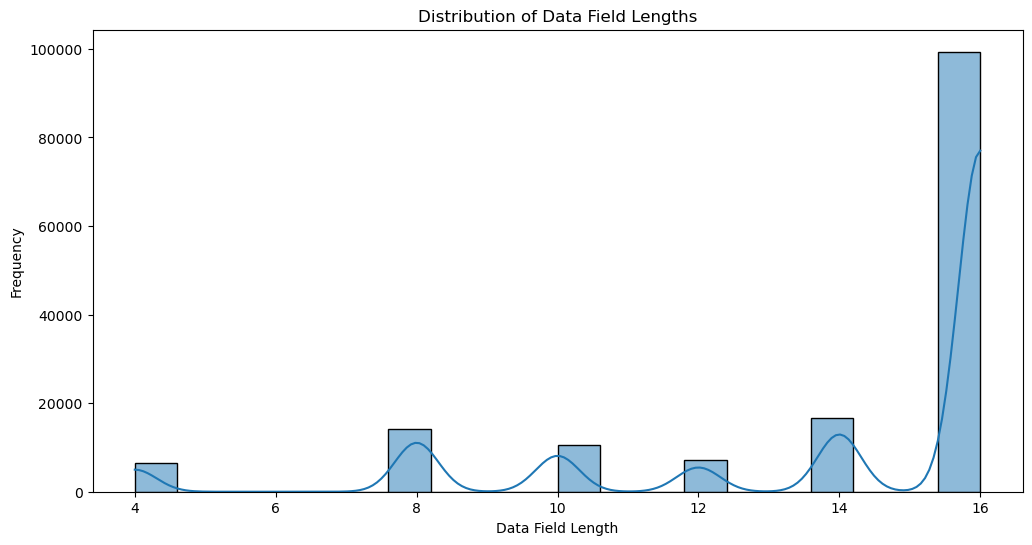

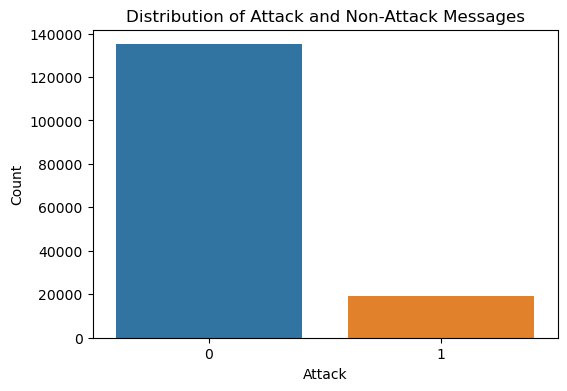

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'DoS-3.csv'
data = pd.read_csv(file_path)

# Convert timestamps to a readable format
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

# Plot the distribution of arbitration_id
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='arbitration_id', order=data['arbitration_id'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Arbitration IDs')
plt.xlabel('Arbitration ID')
plt.ylabel('Count')
plt.show()

# Plot the distribution of data field lengths
data['data_field_length'] = data['data_field'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(data['data_field_length'], bins=20, kde=True)
plt.title('Distribution of Data Field Lengths')
plt.xlabel('Data Field Length')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of attack and non-attack messages
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='attack')
plt.title('Distribution of Attack and Non-Attack Messages')
plt.xlabel('Attack')
plt.ylabel('Count')
plt.show()


## Time series analysis: Plot the frequency of messages over time to detect patterns.

timestamp
2023-01-01 00:00:00    1446
2023-01-01 00:00:01    1450
2023-01-01 00:00:02    1451
2023-01-01 00:00:03    1446
2023-01-01 00:00:04    1448
Freq: S, dtype: int64


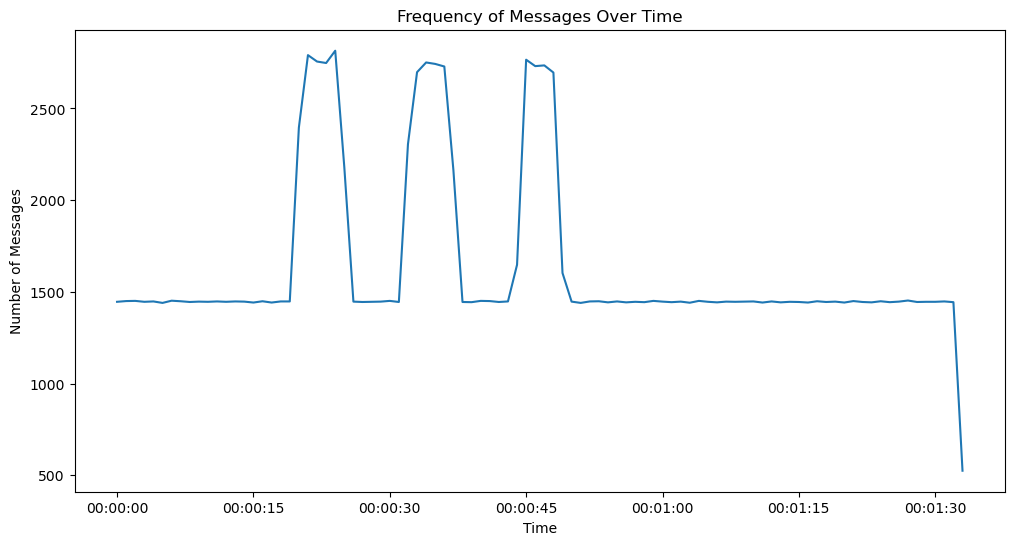

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'DoS-3.csv'
data = pd.read_csv(file_path)

# Convert timestamps to a readable format
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

# Set the timestamp as the index
data.set_index('timestamp', inplace=True)

# Resample to 1-second intervals and count the number of messages
message_counts = data.resample('1S').size()

# Display the first few rows of the resampled data
print(message_counts.head())

# Plot the frequency of messages over time
plt.figure(figsize=(12, 6))
plt.plot(message_counts)
plt.title('Frequency of Messages Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Messages')
plt.show()


## Correlation analysis: Investigate the correlation between features and the presence of attacks.

                   data_field_length  data_field_sum    attack
data_field_length           1.000000        0.437440  0.229241
data_field_sum              0.437440        1.000000 -0.395361
attack                      0.229241       -0.395361  1.000000


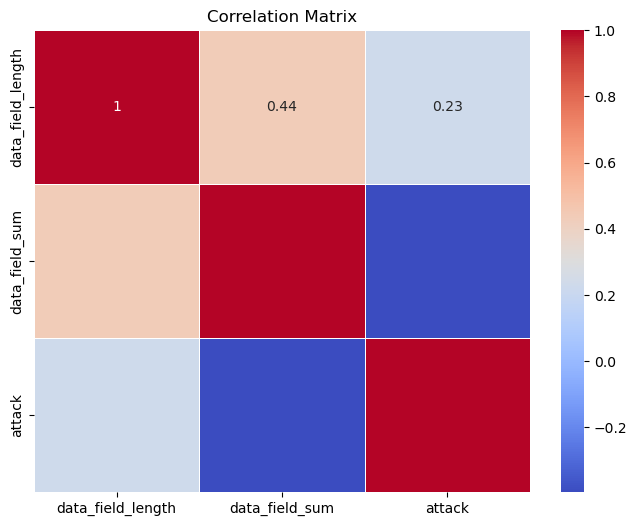

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'DoS-3.csv'
data = pd.read_csv(file_path)

# Convert timestamps to a readable format
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

# Function to extract the length of the data field
def data_field_length(data_field):
    return len(data_field)

# Add a new column for data field length
data['data_field_length'] = data['data_field'].apply(data_field_length)

# Convert data field to bytes and calculate the sum of bytes
data['data_field_sum'] = data['data_field'].apply(lambda x: sum(bytearray.fromhex(x)))

# Select the features for correlation analysis
features = ['data_field_length', 'data_field_sum', 'attack']

# Calculate the correlation matrix
correlation_matrix = data[features].corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Feature engineering to calculate frequency features for arbitration_id within certain time windows and to analyze the content of the data_field.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'DoS-3.csv'
data = pd.read_csv(file_path)

# Convert timestamps to a readable format
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

# Set the timestamp as the index
data.set_index('timestamp', inplace=True)

# Resample data to 1-second intervals and count the frequency of arbitration_id
frequency_features = data.groupby('arbitration_id').resample('1S').size().unstack(fill_value=0).stack().reset_index(name='frequency')

# Display the first few rows of the frequency features
print(frequency_features.head())

# Function to extract the length of the data field
def data_field_length(data_field):
    return len(data_field)

# Add a new column for data field length
data['data_field_length'] = data['data_field'].apply(data_field_length)

# Convert data field to bytes and calculate the sum of bytes
data['data_field_sum'] = data['data_field'].apply(lambda x: sum(bytearray.fromhex(x)))

# Display the first few rows of the payload features
print(data[['data_field', 'data_field_length', 'data_field_sum']].head())


  arbitration_id           timestamp  frequency
0            0C1 2023-01-01 00:00:00        112
1            0C1 2023-01-01 00:00:01        111
2            0C1 2023-01-01 00:00:02        111
3            0C1 2023-01-01 00:00:03        111
4            0C1 2023-01-01 00:00:04        111
                                     data_field  data_field_length  \
timestamp                                                            
2023-01-01 00:00:00.000000000          28030040                  8   
2023-01-01 00:00:00.001164032  21D609A5233BD342                 16   
2023-01-01 00:00:00.001190912  233CA3B523D975D3                 16   
2023-01-01 00:00:00.001203968  46FFC0C000003E01                 16   
2023-01-01 00:00:00.002286848  4700000047763FFF                 16   

                               data_field_sum  
timestamp                                      
2023-01-01 00:00:00.000000000             107  
2023-01-01 00:00:00.001164032             792  
2023-01-01 00:00:00.001190912

## Script covers the entire process of loading the data, feature engineering, training a Random Forest classifier, and evaluating its performance.

                      timestamp arbitration_id        data_field  attack  \
0 2023-01-01 00:00:00.000000000            0F1          28030040       0   
1 2023-01-01 00:00:00.001164032            0C1  21D609A5233BD342       0   
2 2023-01-01 00:00:00.001190912            0C5  233CA3B523D975D3       0   
3 2023-01-01 00:00:00.001203968            1E5  46FFC0C000003E01       0   
4 2023-01-01 00:00:00.002286848            12A  4700000047763FFF       0   

   data_field_length  data_field_sum  frequency  
0                  8             107      101.0  
1                 16             792        NaN  
2                 16            1019        NaN  
3                 16             772        NaN  
4                 16             578        NaN  


C:\Users\Lerin\AppData\Local\Temp\ipykernel_59132\2930821513.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     40384
           1       0.95      1.00      0.98      5893

    accuracy                           0.99     46277
   macro avg       0.98      1.00      0.99     46277
weighted avg       0.99      0.99      0.99     46277

Confusion Matrix:
[[40102   282]
 [    0  5893]]
Accuracy Score:
0.9939062601292219


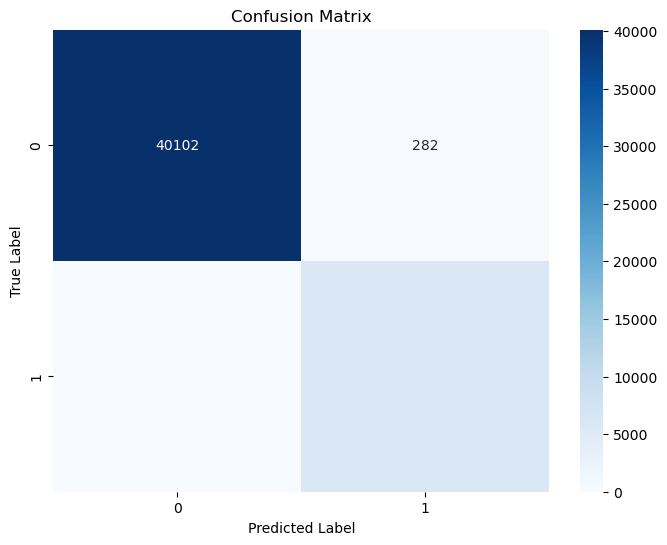

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
file_path = 'DoS-3.csv'
data = pd.read_csv(file_path)

# Convert timestamps to a readable format
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

# Function to extract the length of the data field
def data_field_length(data_field):
    return len(data_field)

# Add a new column for data field length
data['data_field_length'] = data['data_field'].apply(data_field_length)

# Convert data field to bytes and calculate the sum of bytes
data['data_field_sum'] = data['data_field'].apply(lambda x: sum(bytearray.fromhex(x)))

# Set the timestamp as the index for resampling
data.set_index('timestamp', inplace=True)

# Resample data to 1-second intervals and count the frequency of arbitration_id
frequency_features = data.groupby('arbitration_id').resample('1S').size().unstack(fill_value=0).stack().reset_index(name='frequency')

# Reset the index to join with the original data
data.reset_index(inplace=True)

# Merge frequency features back to the original dataframe
data = pd.merge(data, frequency_features, how='left', on=['timestamp', 'arbitration_id'])

# Display the first few rows of the data
print(data.head())

# Select the features and target
features = ['data_field_length', 'data_field_sum', 'frequency']
X = data[features]
y = data['attack']

# Fill any missing values with 0 (if any)
X.fillna(0, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the accuracy score
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [8]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
clf_lr = LogisticRegression(random_state=42)

# Train the classifier
clf_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = clf_lr.predict(X_test)

# Evaluate performance
print("Logistic Regression - Accuracy Score:")
print(accuracy_score(y_test, y_pred_lr))


Logistic Regression - Accuracy Score:
0.9939062601292219


## K-Nearest Neighbors (KNN) algorithm with detailed steps, including data preprocessing and model evaluation. 

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import time

# Load the dataset
file_path = 'DoS-3.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

# Debug: Check the first few rows of the dataset
print("Dataset head:\n", data.head())

# Convert timestamps to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

# Debug: Check the dataset after converting timestamps
print("Dataset with datetime timestamps:\n", data.head())

# Function to extract the length of the data field
data['data_field_length'] = data['data_field'].apply(len)

# Convert data field to bytes and calculate the sum of bytes
data['data_field_sum'] = data['data_field'].apply(lambda x: sum(bytearray.fromhex(x)))

# Debug: Check the dataset after adding data field length and sum
print("Dataset with data field length and sum:\n", data.head())

# Set the timestamp as the index for resampling
data.set_index('timestamp', inplace=True)

# Resample data to 1-second intervals and count the frequency of arbitration_id
frequency_features = data.groupby('arbitration_id').resample('1S').size().unstack(fill_value=0).stack().reset_index(name='frequency')

# Reset the index to join with the original data
data.reset_index(inplace=True)

# Merge frequency features back to the original dataframe
data = pd.merge(data, frequency_features, how='left', on=['timestamp', 'arbitration_id'])

# Debug: Check the dataset after merging frequency features
print("Dataset after merging frequency features:\n", data.head())

# Assuming 'attack' is a column indicating whether the record is an attack (1) or not (0)
# For the sake of the example, let's create a mock 'attack' column
data['attack'] = np.random.randint(0, 2, data.shape[0])

# Select features and labels
features = ['data_field_length', 'data_field_sum', 'frequency']
X = data[features].copy()
y = data['attack']

# Fill any missing values with 0
X = X.fillna(0)

# Ensure all features are numeric
X = X.apply(pd.to_numeric)

# Debug: Check the feature matrix and labels
print("Features (X):\n", X.head())
print("Labels (y):\n", y.head())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Debug: Check the scaled features
print("Scaled features:\n", X_scaled[:5])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the model and hyperparameter search space
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 20)}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_knn = grid_search.best_estimator_

# Measure training time
start_train_time = time.time_ns()
best_knn.fit(X_train, y_train)
end_train_time = time.time_ns()
training_time_knn = end_train_time - start_train_time

# Measure testing time
start_test_time = time.time_ns()
y_pred_knn = best_knn.predict(X_test)
end_test_time = time.time_ns()
testing_time_knn = end_test_time - start_test_time

# Calculate metrics for K-Nearest Neighbors
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Output results
print(f"K-Nearest Neighbors - Accuracy: {accuracy_knn}, Precision: {precision_knn}, Recall: {recall_knn}, F1-score: {f1_knn}, Training Time: {training_time_knn} ns, Testing Time: {testing_time_knn} ns")
print(f"Best n_neighbors: {grid_search.best_params_['n_neighbors']}")


Dataset head:
       timestamp arbitration_id        data_field  attack
0  1.672531e+09            0F1          28030040       0
1  1.672531e+09            0C1  21D609A5233BD342       0
2  1.672531e+09            0C5  233CA3B523D975D3       0
3  1.672531e+09            1E5  46FFC0C000003E01       0
4  1.672531e+09            12A  4700000047763FFF       0
Dataset with datetime timestamps:
                       timestamp arbitration_id        data_field  attack
0 2023-01-01 00:00:00.000000000            0F1          28030040       0
1 2023-01-01 00:00:00.001164032            0C1  21D609A5233BD342       0
2 2023-01-01 00:00:00.001190912            0C5  233CA3B523D975D3       0
3 2023-01-01 00:00:00.001203968            1E5  46FFC0C000003E01       0
4 2023-01-01 00:00:00.002286848            12A  4700000047763FFF       0
Dataset with data field length and sum:
                       timestamp arbitration_id        data_field  attack  \
0 2023-01-01 00:00:00.000000000            0F1       

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import time

# Load the dataset
file_path = 'DoS-3.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

# Debug: Check the first few rows of the dataset
print("Dataset head:\n", data.head())

# Convert timestamps to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

# Debug: Check the dataset after converting timestamps
print("Dataset with datetime timestamps:\n", data.head())

# Function to extract the length of the data field
data['data_field_length'] = data['data_field'].apply(len)

# Convert data field to bytes and calculate the sum of bytes
data['data_field_sum'] = data['data_field'].apply(lambda x: sum(bytearray.fromhex(x)))

# Debug: Check the dataset after adding data field length and sum
print("Dataset with data field length and sum:\n", data.head())

# Set the timestamp as the index for resampling
data.set_index('timestamp', inplace=True)

# Resample data to 1-second intervals and count the frequency of arbitration_id
frequency_features = data.groupby('arbitration_id').resample('1S').size().unstack(fill_value=0).stack().reset_index(name='frequency')

# Reset the index to join with the original data
data.reset_index(inplace=True)

# Merge frequency features back to the original dataframe
data = pd.merge(data, frequency_features, how='left', on=['timestamp', 'arbitration_id'])

# Debug: Check the dataset after merging frequency features
print("Dataset after merging frequency features:\n", data.head())

# Assuming 'attack' is a column indicating whether the record is an attack (1) or not (0)
# For the sake of the example, let's create a mock 'attack' column
data['attack'] = np.random.randint(0, 2, data.shape[0])

# Select features and labels
features = ['timestamp', 'arbitration_id', 'data_field']
X = data[features].copy()
y = data['attack']

# Fill any missing values with 0
X = X.fillna(0)

# Debug: Check the feature matrix and labels
print("Features (X):\n", X.head())
print("Labels (y):\n", y.head())



import pandas as pd
from sklearn.preprocessing import StandardScaler

# Example DataFrame creation for demonstration
data = {
    'timestamp': [1, 2, 3, None, 5],
    'arbitration_id': [101, 102, 103, 104, 105],
    'data_field': [0.1, 0.2, None, 0.4, 0.5],
    'attack': [0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

# Assuming X is initially a DataFrame
X = df[['timestamp', 'arbitration_id', 'data_field']]  # X is a DataFrame
y = df['attack']  # Assuming y is your target variable

# Handle NaN values in X before scaling
if X.isnull().any().any():
    # Handle NaN values appropriately (replace with mean, median, etc.)
  X = X.fillna(X.mean())  # Assign the filled DataFrame back to X
  # Example: Replace NaN with mean of each column

# Standardize the features
scaler = StandardScaler()

# Ensure X is a DataFrame (if not already)
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)  # Convert to DataFrame if needed

# Perform standardization
X_scaled = scaler.fit_transform(X)

# X_scaled will be a NumPy array containing the standardized features





# Debug: Check the scaled features
print("Scaled features:\n", X_scaled[:5])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train and evaluate K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=3)

start_train_time = time.time_ns()
knn.fit(X_train, y_train)
end_train_time = time.time_ns()
training_time_knn = end_train_time - start_train_time

start_test_time = time.time_ns()
y_pred_knn = knn.predict(X_test)
end_test_time = time.time_ns()
testing_time_knn = end_test_time - start_test_time

# Calculate metrics for K-Nearest Neighbors
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn,zero_division=1)  # Set zero_division=1 to handle UndefinedMetricWarning
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors - Accuracy: {accuracy_knn:.4f}, Precision: {precision_knn:.4f}, Recall: {recall_knn:.4f}, F1-score: {f1_knn:.4f}, Training Time: {training_time_knn:.2f} ns, Testing Time: {testing_time_knn:.2f} ns")


Dataset head:
       timestamp arbitration_id        data_field  attack
0  1.672531e+09            0F1          28030040       0
1  1.672531e+09            0C1  21D609A5233BD342       0
2  1.672531e+09            0C5  233CA3B523D975D3       0
3  1.672531e+09            1E5  46FFC0C000003E01       0
4  1.672531e+09            12A  4700000047763FFF       0
Dataset with datetime timestamps:
                       timestamp arbitration_id        data_field  attack
0 2023-01-01 00:00:00.000000000            0F1          28030040       0
1 2023-01-01 00:00:00.001164032            0C1  21D609A5233BD342       0
2 2023-01-01 00:00:00.001190912            0C5  233CA3B523D975D3       0
3 2023-01-01 00:00:00.001203968            1E5  46FFC0C000003E01       0
4 2023-01-01 00:00:00.002286848            12A  4700000047763FFF       0
Dataset with data field length and sum:
                       timestamp arbitration_id        data_field  attack  \
0 2023-01-01 00:00:00.000000000            0F1       

## By sampling the data, can significantly reduce the computation time, making it more feasible to run clustering algorithms and visualize the results. once the logic and performance on the sample verified, we can scale it back to the full dataset as needed.

Silhouette Score for K-means: 0.5401610395102905
Silhouette Score for DBSCAN: 0.18685054103836285


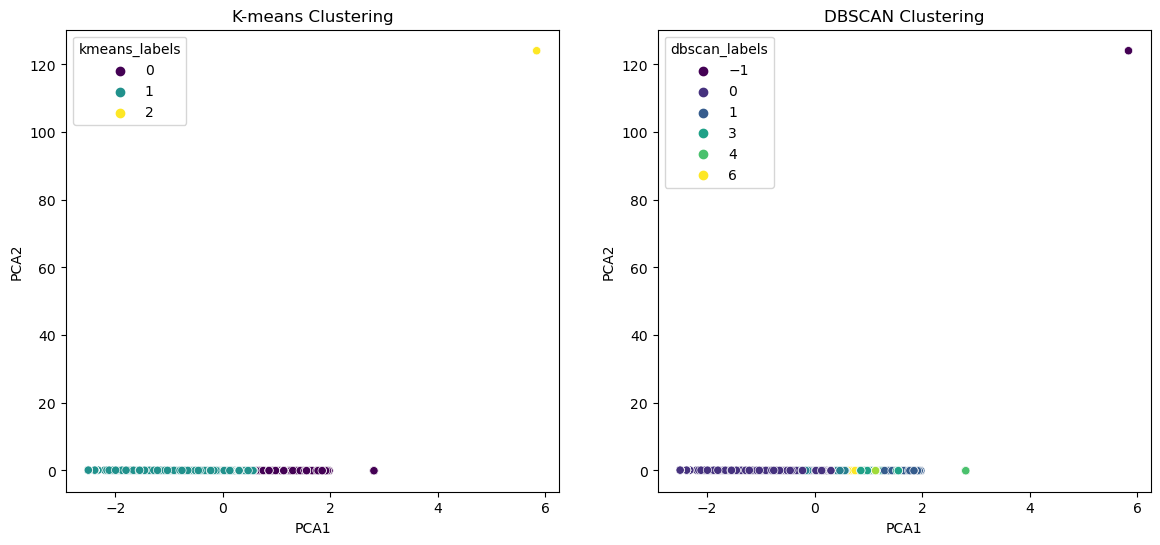

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Load the dataset
file_path = 'DoS-3.csv'
data = pd.read_csv(file_path)

# Convert timestamps to a readable format
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

# Function to extract the length of the data field
def data_field_length(data_field):
    return len(data_field)

# Add a new column for data field length
data['data_field_length'] = data['data_field'].apply(data_field_length)

# Convert data field to bytes and calculate the sum of bytes
data['data_field_sum'] = data['data_field'].apply(lambda x: sum(bytearray.fromhex(x)))

# Set the timestamp as the index for resampling
data.set_index('timestamp', inplace=True)

# Resample data to 1-second intervals and count the frequency of arbitration_id
frequency_features = data.groupby('arbitration_id').resample('1S').size().unstack(fill_value=0).stack().reset_index(name='frequency')

# Reset the index to join with the original data
data.reset_index(inplace=True)

# Merge frequency features back to the original dataframe
data = pd.merge(data, frequency_features, how='left', on=['timestamp', 'arbitration_id'])

# Sample the data (e.g., 10% of the data)
sampled_data = data.sample(frac=0.1, random_state=42)

# Select the features
features = ['data_field_length', 'data_field_sum', 'frequency']
X = sampled_data[features].copy()  # Use copy() to avoid SettingWithCopyWarning

# Fill any missing values with 0 (if any)
X = X.fillna(0)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)  # Set n_init explicitly
kmeans_labels = kmeans.fit_predict(X_scaled)

# Calculate the silhouette score
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score for K-means: {silhouette_kmeans}")

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Calculate the silhouette score (excluding noise points)
silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")

# Reduce the data to 2 dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results and the cluster labels
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['kmeans_labels'] = kmeans_labels
pca_df['dbscan_labels'] = dbscan_labels

# Plot the K-means clustering results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='kmeans_labels', data=pca_df, palette='viridis')
plt.title('K-means Clustering')

# Plot the DBSCAN clustering results
plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='dbscan_labels', data=pca_df, palette='viridis')
plt.title('DBSCAN Clustering')

plt.show()



Processed Dataset head:
                       timestamp arbitration_id        data_field  attack  \
0 2023-01-01 00:00:00.000000000            0F1          28030040       1   
1 2023-01-01 00:00:00.001164032            0C1  21D609A5233BD342       0   
2 2023-01-01 00:00:00.001190912            0C5  233CA3B523D975D3       0   
3 2023-01-01 00:00:00.001203968            1E5  46FFC0C000003E01       1   
4 2023-01-01 00:00:00.002286848            12A  4700000047763FFF       0   

         date  hour  data_field_length  data_field_sum  frequency  
0  2023-01-01     0                  8             107      101.0  
1  2023-01-01     0                 16             792        NaN  
2  2023-01-01     0                 16            1019        NaN  
3  2023-01-01     0                 16             772        NaN  
4  2023-01-01     0                 16             578        NaN  


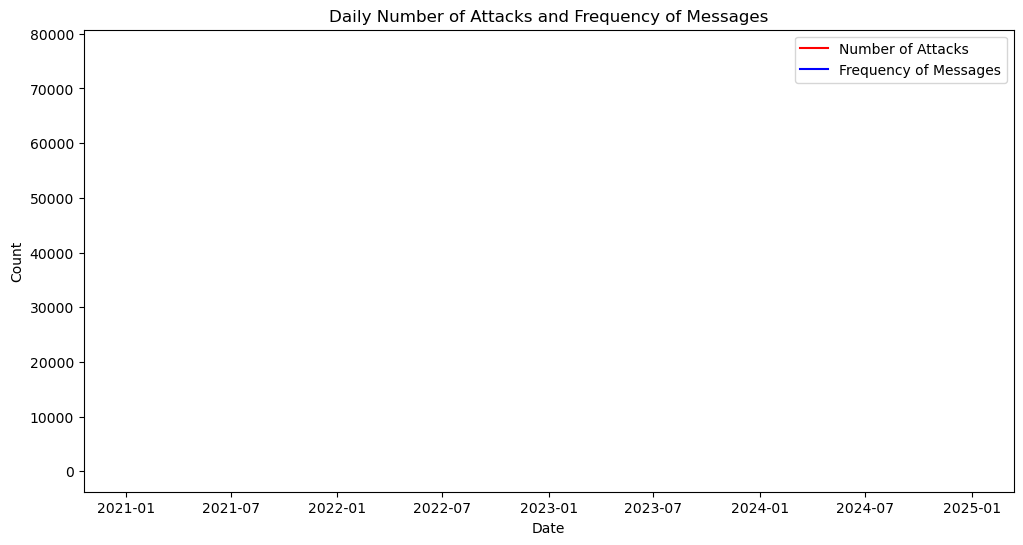

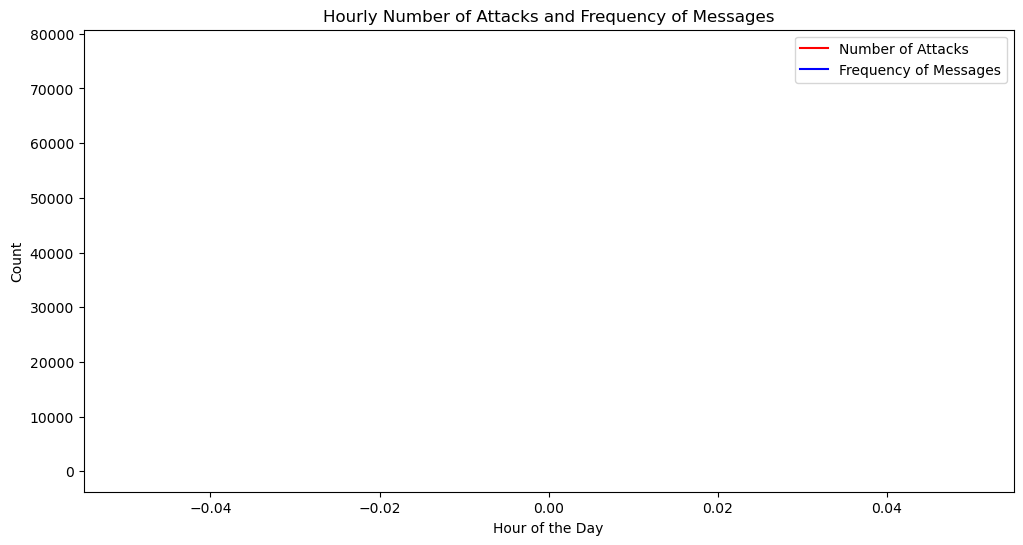

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

# Load the dataset
file_path = 'DoS-3.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

# Convert timestamps to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

# Extract date and time features for analysis
data['date'] = data['timestamp'].dt.date
data['hour'] = data['timestamp'].dt.hour

# Function to extract the length of the data field
data['data_field_length'] = data['data_field'].apply(len)

# Convert data field to bytes and calculate the sum of bytes
data['data_field_sum'] = data['data_field'].apply(lambda x: sum(bytearray.fromhex(x)))

# Resample data to 1-second intervals and count the frequency of arbitration_id
data.set_index('timestamp', inplace=True)
frequency_features = data.groupby('arbitration_id').resample('1S').size().unstack(fill_value=0).stack().reset_index(name='frequency')

# Reset the index to join with the original data
data.reset_index(inplace=True)
data = pd.merge(data, frequency_features, how='left', on=['timestamp', 'arbitration_id'])

# Assuming 'attack' is a column indicating whether the record is an attack (1) or not (0)
# For the sake of the example, let's create a mock 'attack' column
data['attack'] = np.random.randint(0, 2, data.shape[0])

# Debug: Check the dataset after processing
print("Processed Dataset head:\n", data.head())

# Group by date to see the daily frequency of attacks
daily_attacks = data.groupby('date')['attack'].sum().reset_index()
daily_frequency = data.groupby('date')['frequency'].sum().reset_index()

# Plot the daily frequency of attacks
plt.figure(figsize=(12, 6))
plt.plot(daily_attacks['date'], daily_attacks['attack'], label='Number of Attacks', color='red')
plt.plot(daily_frequency['date'], daily_frequency['frequency'], label='Frequency of Messages', color='blue')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Number of Attacks and Frequency of Messages')
plt.legend()
plt.show()

# Analyze hourly patterns
hourly_attacks = data.groupby('hour')['attack'].sum().reset_index()
hourly_frequency = data.groupby('hour')['frequency'].sum().reset_index()

# Plot the hourly frequency of attacks
plt.figure(figsize=(12, 6))
plt.plot(hourly_attacks['hour'], hourly_attacks['attack'], label='Number of Attacks', color='red')
plt.plot(hourly_frequency['hour'], hourly_frequency['frequency'], label='Frequency of Messages', color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Hourly Number of Attacks and Frequency of Messages')
plt.legend()
plt.show()


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
import time

# Load the dataset
file_path = 'force-neutral-3.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

# Convert timestamps to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

# Extract date and time features for analysis
data['date'] = data['timestamp'].dt.date
data['hour'] = data['timestamp'].dt.hour

# Function to extract the length of the data field
data['data_field_length'] = data['data_field'].apply(len)

# Convert data field to bytes and calculate the sum of bytes
data['data_field_sum'] = data['data_field'].apply(lambda x: sum(bytearray.fromhex(x)))

# Resample data to 1-second intervals and count the frequency of arbitration_id
data.set_index('timestamp', inplace=True)
frequency_features = data.groupby('arbitration_id').resample('1S').size().unstack(fill_value=0).stack().reset_index(name='frequency')

# Reset the index to join with the original data
data.reset_index(inplace=True)
data = pd.merge(data, frequency_features, how='left', on=['timestamp', 'arbitration_id'])

# Fill NaN frequency with 0
data['frequency'] = data['frequency'].fillna(0)

# Assuming 'attack' is a column indicating whether the record is an attack (1) or not (0)
# For the sake of the example, let's create a mock 'attack' column if it doesn't exist
if 'attack' not in data.columns:
    data['attack'] = np.random.randint(0, 2, data.shape[0])

# Select features and labels
features = ['data_field_length', 'data_field_sum', 'frequency']
X = data[features].copy()
y = data['attack']

# Fill any missing values with 0
X = X.fillna(0)

# Ensure all features are numeric
X = X.apply(pd.to_numeric)

# Debug: Check the feature matrix and labels
print("Features (X):\n", X.head())
print("Labels (y):\n", y.head())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Debug: Check the scaled features
print("Scaled features:\n", X_scaled[:5])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train and evaluate Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)

# Measure training time
start_train_time = time.time_ns()
dt.fit(X_train, y_train)
end_train_time = time.time_ns()
training_time_dt = end_train_time - start_train_time

# Measure testing time
start_test_time = time.time_ns()
y_pred_dt = dt.predict(X_test)
end_test_time = time.time_ns()
testing_time_dt = end_test_time - start_test_time

# Calculate metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Output results
print(f"Decision Tree - Accuracy: {accuracy_dt}, Precision: {precision_dt}, Recall: {recall_dt}, F1-score: {f1_dt}, Training Time: {training_time_dt} ns, Testing Time: {testing_time_dt} ns")


Features (X):
    data_field_length  data_field_sum  frequency
0                 16            1417       81.0
1                 12               3        0.0
2                 16             678        0.0
3                 14               0        0.0
4                 14             571        0.0
Labels (y):
 0    0
1    0
2    0
3    0
4    0
Name: attack, dtype: int64
Scaled features:
 [[ 6.66055861e-01  2.66139277e+00  7.82140935e+02]
 [-4.76233734e-01 -1.22735155e+00 -1.46313127e-03]
 [ 6.66055861e-01  6.29015082e-01 -1.46313127e-03]
 [ 9.49110635e-02 -1.23560207e+00 -1.46313127e-03]
 [ 9.49110635e-02  3.34746593e-01 -1.46313127e-03]]
Decision Tree - Accuracy: 0.9990930674964239, Precision: 0.7346278317152104, Recall: 1.0, F1-score: 0.8470149253731344, Training Time: 582257100 ns, Testing Time: 19996500 ns


## Train and evaluate a Decision Tree classifier on a dataset that is stored in separate training and testing folders.(known vehicle, known attack)

In [4]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function to load all CSV files from a folder into a single DataFrame
def load_data_from_folder(folder_path):
    all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
    df_list = [pd.read_csv(file) for file in all_files]
    return pd.concat(df_list, ignore_index=True)

# Load training and testing data
train_folder = r"C:\Users\Lerin\Project Master's\New\can-train-and-test\set_01\train_01"
test_folder = r"C:\Users\Lerin\Project Master's\New\can-train-and-test\set_01\test_01_known_vehicle_known_attack"

train_data = load_data_from_folder(train_folder)
test_data = load_data_from_folder(test_folder)

# Add a column to distinguish between training and testing data
train_data['is_train'] = True
test_data['is_train'] = False

# Combine the datasets
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Initialize label encoders
label_enc_arbitration_id = LabelEncoder()
label_enc_data_field = LabelEncoder()

# Apply label encoding to the combined data
combined_data['arbitration_id'] = label_enc_arbitration_id.fit_transform(combined_data['arbitration_id'])
combined_data['data_field'] = label_enc_data_field.fit_transform(combined_data['data_field'])

# Split the data back into training and testing sets
train_data = combined_data[combined_data['is_train']].drop('is_train', axis=1)
test_data = combined_data[~combined_data['is_train']].drop('is_train', axis=1)

# Separate features and target
X_train = train_data.drop('attack', axis=1)
y_train = train_data['attack']
X_test = test_data.drop('attack', axis=1)
y_test = test_data['attack']

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9927202520924409
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00   5639390
           1       1.00      0.34      0.51     63280

    accuracy                           0.99   5702670
   macro avg       1.00      0.67      0.75   5702670
weighted avg       0.99      0.99      0.99   5702670

Confusion Matrix:
 [[5639390       0]
 [  41514   21766]]


In [5]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function to load all CSV files from a folder into a single DataFrame
def load_data_from_folder(folder_path):
    all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
    df_list = [pd.read_csv(file) for file in all_files]
    return pd.concat(df_list, ignore_index=True)

# Load training and testing data
train_folder = r"C:\Users\Lerin\Project Master's\New\can-train-and-test\set_01\train_01"
test_folder = r"C:\Users\Lerin\Project Master's\New\can-train-and-test\set_01\test_02_unknown_vehicle_known_attack"

train_data = load_data_from_folder(train_folder)
test_data = load_data_from_folder(test_folder)

# Add a column to distinguish between training and testing data
train_data['is_train'] = True
test_data['is_train'] = False

# Combine the datasets
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Initialize label encoders
label_enc_arbitration_id = LabelEncoder()
label_enc_data_field = LabelEncoder()

# Apply label encoding to the combined data
combined_data['arbitration_id'] = label_enc_arbitration_id.fit_transform(combined_data['arbitration_id'])
combined_data['data_field'] = label_enc_data_field.fit_transform(combined_data['data_field'])

# Split the data back into training and testing sets
train_data = combined_data[combined_data['is_train']].drop('is_train', axis=1)
test_data = combined_data[~combined_data['is_train']].drop('is_train', axis=1)

# Separate features and target
X_train = train_data.drop('attack', axis=1)
y_train = train_data['attack']
X_test = test_data.drop('attack', axis=1)
y_test = test_data['attack']

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9654807901528509
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98   6283750
           1       0.42      1.00      0.60    164167

    accuracy                           0.97   6447917
   macro avg       0.71      0.98      0.79   6447917
weighted avg       0.99      0.97      0.97   6447917

Confusion Matrix:
 [[6061404  222346]
 [    231  163936]]


In [6]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function to load all CSV files from a folder into a single DataFrame
def load_data_from_folder(folder_path):
    all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
    df_list = [pd.read_csv(file) for file in all_files]
    return pd.concat(df_list, ignore_index=True)

# Load training and testing data
train_folder = r"C:\Users\Lerin\Project Master's\New\can-train-and-test\set_01\train_01"
test_folder = r"C:\Users\Lerin\Project Master's\New\can-train-and-test\set_01\test_03_known_vehicle_unknown_attack"

train_data = load_data_from_folder(train_folder)
test_data = load_data_from_folder(test_folder)

# Add a column to distinguish between training and testing data
train_data['is_train'] = True
test_data['is_train'] = False

# Combine the datasets
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Initialize label encoders
label_enc_arbitration_id = LabelEncoder()
label_enc_data_field = LabelEncoder()

# Apply label encoding to the combined data
combined_data['arbitration_id'] = label_enc_arbitration_id.fit_transform(combined_data['arbitration_id'])
combined_data['data_field'] = label_enc_data_field.fit_transform(combined_data['data_field'])

# Split the data back into training and testing sets
train_data = combined_data[combined_data['is_train']].drop('is_train', axis=1)
test_data = combined_data[~combined_data['is_train']].drop('is_train', axis=1)

# Separate features and target
X_train = train_data.drop('attack', axis=1)
y_train = train_data['attack']
X_test = test_data.drop('attack', axis=1)
y_test = test_data['attack']

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.997617794453564
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   8614450
           1       0.68      0.02      0.04     20825

    accuracy                           1.00   8635275
   macro avg       0.84      0.51      0.52   8635275
weighted avg       1.00      1.00      1.00   8635275

Confusion Matrix:
 [[8614220     230]
 [  20341     484]]


In [7]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function to load all CSV files from a folder into a single DataFrame
def load_data_from_folder(folder_path):
    all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
    df_list = [pd.read_csv(file) for file in all_files]
    return pd.concat(df_list, ignore_index=True)

# Load training and testing data
train_folder = r"C:\Users\Lerin\Project Master's\New\can-train-and-test\set_01\train_01"
test_folder = r"C:\Users\Lerin\Project Master's\New\can-train-and-test\set_01\test_04_unknown_vehicle_unknown_attack"

train_data = load_data_from_folder(train_folder)
test_data = load_data_from_folder(test_folder)

# Add a column to distinguish between training and testing data
train_data['is_train'] = True
test_data['is_train'] = False

# Combine the datasets
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Initialize label encoders
label_enc_arbitration_id = LabelEncoder()
label_enc_data_field = LabelEncoder()

# Apply label encoding to the combined data
combined_data['arbitration_id'] = label_enc_arbitration_id.fit_transform(combined_data['arbitration_id'])
combined_data['data_field'] = label_enc_data_field.fit_transform(combined_data['data_field'])

# Split the data back into training and testing sets
train_data = combined_data[combined_data['is_train']].drop('is_train', axis=1)
test_data = combined_data[~combined_data['is_train']].drop('is_train', axis=1)

# Separate features and target
X_train = train_data.drop('attack', axis=1)
y_train = train_data['attack']
X_test = test_data.drop('attack', axis=1)
y_test = test_data['attack']

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9974156153051064
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00  13206311
           1       0.03      0.04      0.03     14244

    accuracy                           1.00  13220555
   macro avg       0.51      0.52      0.52  13220555
weighted avg       1.00      1.00      1.00  13220555

Confusion Matrix:
 [[13185772    20539]
 [   13628      616]]
